<a href="https://colab.research.google.com/github/Sh1ynx/Machine-Learning-Projects/blob/main/ecommarce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ecommerce Customers.csv")
df

Mounted at /content/drive


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Prepare Data

## Seperating X and Y

In [ ]:
x = df.drop(["Yearly Amount Spent","Email", "Address", "Avatar"], axis=1)
y = df["Yearly Amount Spent"]
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100)

# Model Building

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### XGBoost

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_xgb_train_pred = xgb.predict(x_train)
y_xgb_test_pred = xgb.predict(x_test)

# Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

#Linear Regresssion
y_lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
y_lr_train_r2 = r2_score(y_train, y_lr_train_pred)

y_lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
y_lr_test_r2 = r2_score(y_test, y_lr_test_pred)


#RandomForest Regression
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_train, y_rf_train_pred)



#XGB Regression
xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_train, y_xgb_train_pred)

In [ ]:
print(f"LR MSE (Train): {y_lr_train_mse}")
print(f"LR r2 (Train): {y_lr_train_r2}")
print(f"LR MSE (test): {y_lr_test_mse}")
print(f"LR r2 (test): {y_lr_test_r2}")

print("\n")

print(f"RF MSE (Train): {rf_train_mse}")
print(f"RF r2 (Train): {rf_train_r2}")
print(f"Rf MSE (test): {rf_test_mse}")
print(f"Rf r2 (test): {rf_test_r2}")

print("\n")

print(f"XGB MSE (Train): {xgb_train_mse}")
print(f"XGB r2 (Train): {xgb_train_r2}")
print(f"XGB MSE (test): {xgb_test_mse}")
print(f"XGB fr2 (test): {xgb_test_r2}")

LR MSE (Train): 92.93956878255726
LR r2 (Train): 0.9858491144358276
LR MSE (test): 121.12878113887663
LR r2 (test): 0.9762085988255775


RF MSE (Train): 1895.5987847408549
RF r2 (Train): 0.7113780295106497
Rf MSE (test): 2068.9967943322163
Rf r2 (test): 0.7113780295106497


XGB MSE (Train): 0.06404657770239436
XGB r2 (Train): 0.9999902483322903
XGB MSE (test): 292.3412038419323
XGB fr2 (test): 0.9999902483322903


# Plotting

## Linear Regression

Text(0.5, 0, 'Observed Richters')

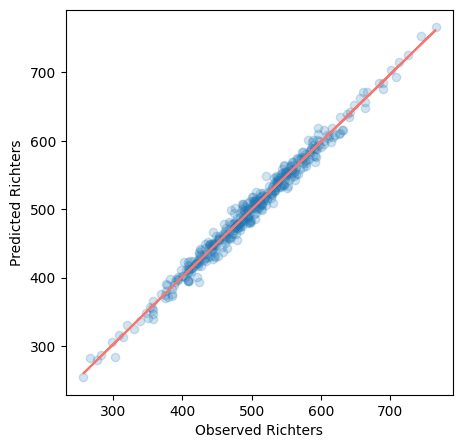

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.2)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)


plt.plot(y_train, p(y_train), '#F8766d')
plt.ylabel("Predicted Richters")
plt.xlabel("Observed Richters")

## Random Forest

Text(0.5, 0, 'Observed Richters')

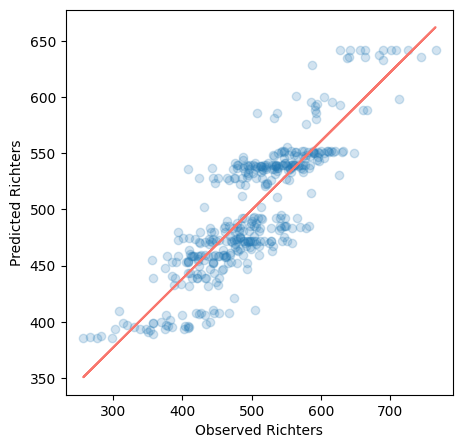

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.2)

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)


plt.plot(y_train, p(y_train), '#F8766d')
plt.ylabel("Predicted Richters")
plt.xlabel("Observed Richters")

## XGBoost

Text(0.5, 0, 'Observed Richters')

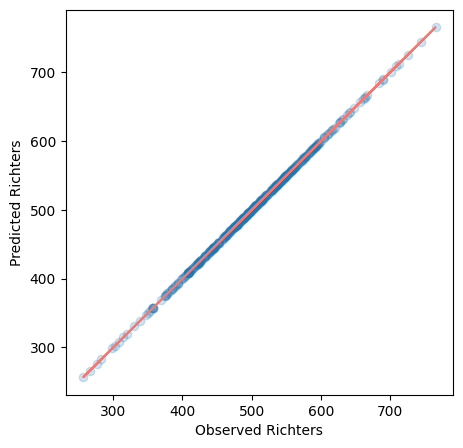

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_xgb_train_pred, alpha=0.2)

z = np.polyfit(y_train, y_xgb_train_pred, 1)
p = np.poly1d(z)


plt.plot(y_train, p(y_train), '#F8766d')
plt.ylabel("Predicted Richters")
plt.xlabel("Observed Richters")